<a href="https://colab.research.google.com/github/ShionFujimori/mnist-fashion-classification/blob/master/mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# import libraries
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# load datasets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2)

x_train = x_train / 255.0
x_valid = x_valid / 255.0
x_test = x_test / 255.0
x_train = np.expand_dims(x_train, axis=3)
x_valid = np.expand_dims(x_valid, axis=3)
x_test = np.expand_dims(x_test, axis=3)

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_valid shape: {x_valid.shape}')
print(f'y_valid shape: {y_valid.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (48000, 28, 28, 1)
y_train shape: (48000,)
x_valid shape: (12000, 28, 28, 1)
y_valid shape: (12000,)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


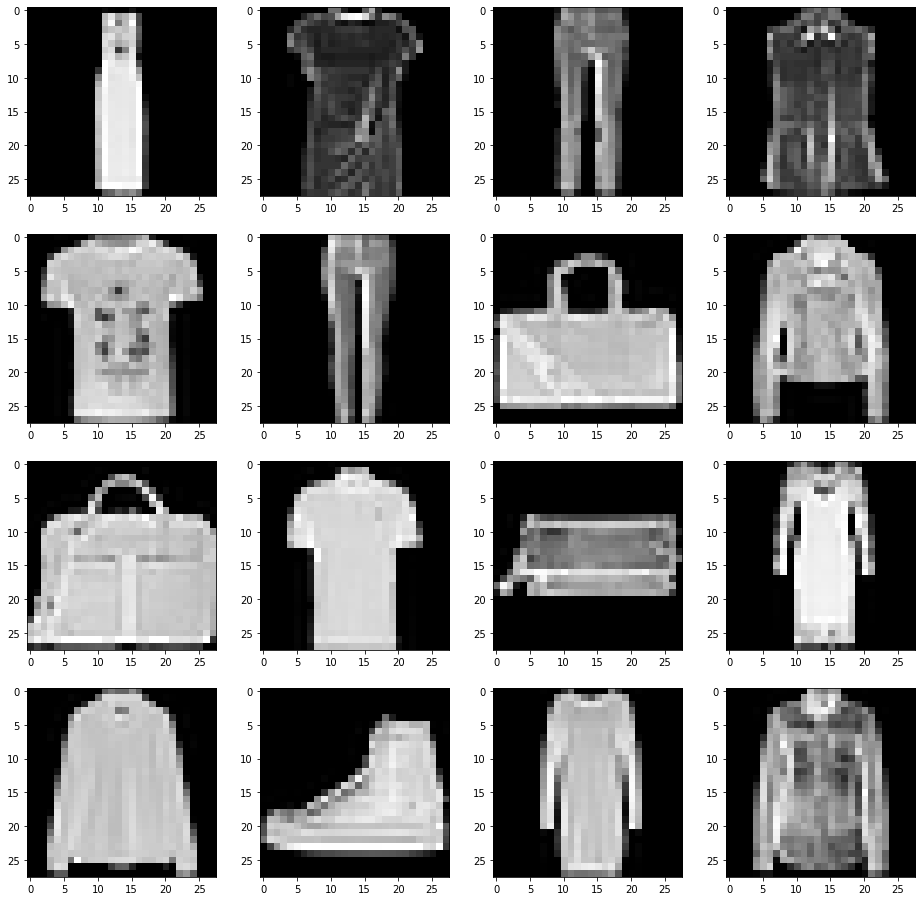

In [5]:
# visualize the data
fig = plt.figure(figsize=(16, 16))
for i in range(16):
  fig.add_subplot(4, 4, i+1).imshow(x_train[i].reshape(28, 28), cmap='gray')
plt.show()

In [4]:
# model structure
model = keras.models.Sequential([
  # first layer
  keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  # second layer
  keras.layers.Conv2D(64, (3, 3), activation='relu'),
  keras.layers.MaxPooling2D(2, 2),
  # flatten the tensor
  keras.layers.Flatten(),
  # 512 neuron hidden layer
  keras.layers.Dense(512, activation='relu'),
  # output layer: 10-class
  keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               819712    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5

In [0]:
# compile the mode
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

In [0]:
# define Callback class
acc_goal = 0.99
class Callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_acc') > acc_goal:
      print(f'\nReached {acc_goal} accuracy so cancelling training')
      self.model.stop_training = True

callbacks = Callback()

In [7]:
# training (fitting)
epoch = 20
batch_size = 512
steps = (x_train.shape[0]-1) // batch_size + 1

history = model.fit(
    x_train,
    y_train,
    validation_data=(x_valid, y_valid),
    batch_size=batch_size,
    steps_per_epoch=steps,
    epochs=epoch,
    verbose=1,
    callbacks=[callbacks]
)

Epoch 1/20
94/94 [==============================] - 1s 10ms/step - loss: 0.7233 - acc: 0.7473 - val_loss: 0.4697 - val_acc: 0.8343
Epoch 2/20
94/94 [==============================] - 1s 8ms/step - loss: 0.4260 - acc: 0.8466 - val_loss: 0.3949 - val_acc: 0.8613
Epoch 3/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3614 - acc: 0.8733 - val_loss: 0.3427 - val_acc: 0.8825
Epoch 4/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3314 - acc: 0.8814 - val_loss: 0.3255 - val_acc: 0.8848
Epoch 5/20
94/94 [==============================] - 1s 8ms/step - loss: 0.3049 - acc: 0.8906 - val_loss: 0.3162 - val_acc: 0.8874
Epoch 6/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2854 - acc: 0.8974 - val_loss: 0.2981 - val_acc: 0.8952
Epoch 7/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2698 - acc: 0.9017 - val_loss: 0.2878 - val_acc: 0.8996
Epoch 8/20
94/94 [==============================] - 1s 8ms/step - loss: 0.2575 - acc: 0.9

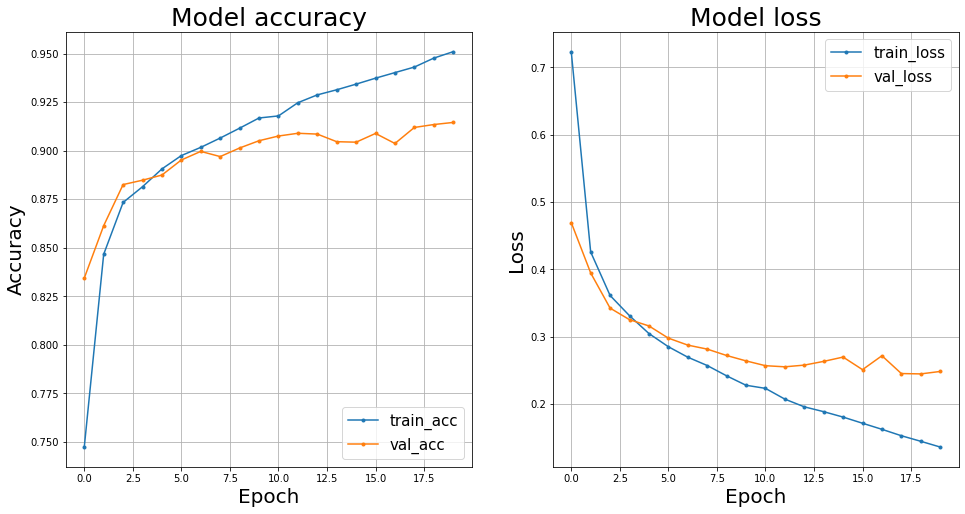

In [8]:
# visualize the training results (vs epoch)
fig = plt.figure(figsize=(16, 8))

# Model accuracy vs epoch
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(history.history['acc'], marker='.', label='train_acc')
ax1.plot(history.history['val_acc'], marker='.', label='val_acc')
plt.title('Model accuracy', fontsize=25)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.grid()
plt.legend(loc='lower right', fontsize=15)

# Model loss vs epoch
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(history.history['loss'], marker='.', label='train_loss')
ax2.plot(history.history['val_loss'], marker='.', label='val_loss')
plt.title('Model loss', fontsize=25)
plt.xlabel('Epoch', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.grid()
plt.legend(loc='upper right', fontsize=15)

plt.show()

In [9]:
# evaluation
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2620 - acc: 0.9113


In [12]:
# running the model
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

uploaded = files.upload()

for fn in uploaded.keys():
  path = './' + fn
  img = image.load_img(path, color_mode='grayscale', target_size=(28, 28))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)

  classes = model.predict(img, batch_size=1)
  class_num = np.argmax(classes[0])
  print(fn + ' is a: ' + class_names[class_num])


Saving ankle_boot.png to ankle_boot (5).png
ankle_boot.png is a: Ankle boot
